In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

In [3]:
print("California Housing Dataset Exploration")
print("\nDataset dimensions:", X.shape)
print("\nFeature names:", X.columns.tolist())
print("\nFirst 5 rows of the dataset:")
X.head()

California Housing Dataset Exploration

Dataset dimensions: (20640, 8)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
print("Target variable (house prices) summary:")
y.describe()

Target variable (house prices) summary:


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

In [5]:
# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())
print("\nMissing values in target:")
print(y.isnull().sum())

Missing values in features:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in target:
0


In [6]:
# Basic statistics of the features
print("Feature statistics:")
X.describe()

Feature statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [7]:
# Correlation with the target variable
correlations = pd.DataFrame(X.corrwith(y).sort_values(ascending=False))
correlations.columns = ['Correlation with MedHouseVal']
print("Correlations with house prices (MedHouseVal):")
correlations

Correlations with house prices (MedHouseVal):


,Correlation with MedHouseVal
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


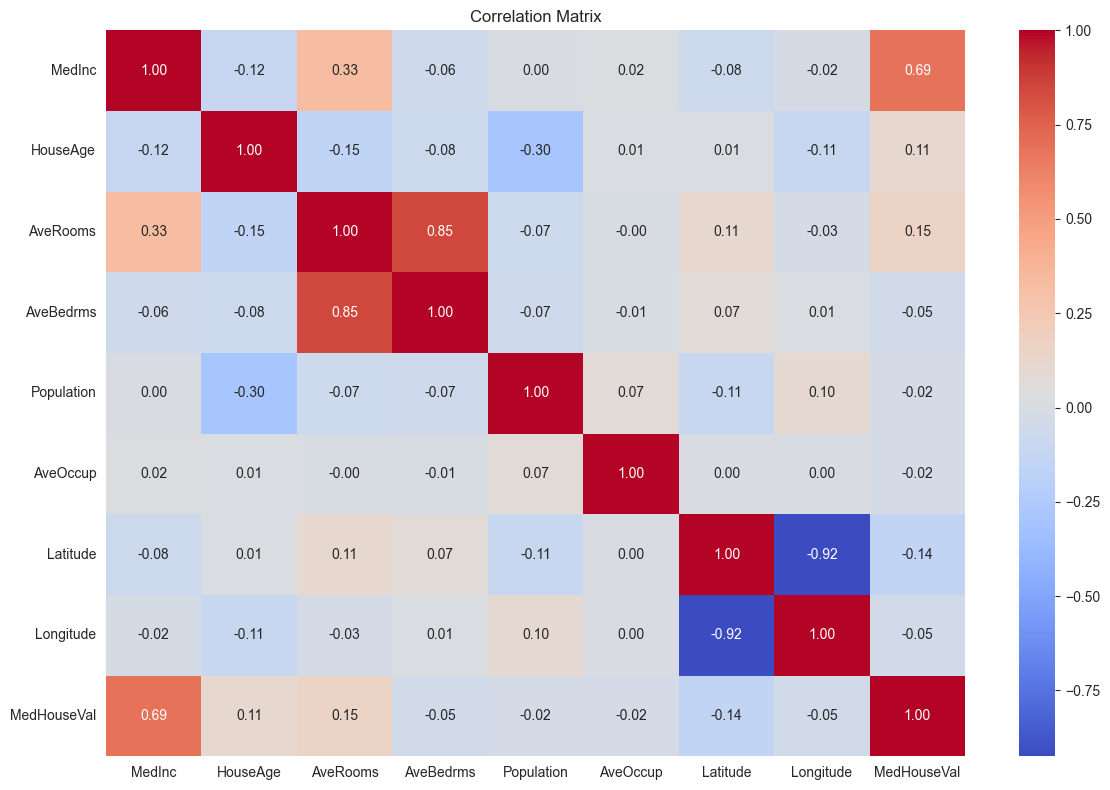

In [8]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


In [10]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Evaluation:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Testing R²: {test_r2:.2f}")

Model Evaluation:
Training MSE: 0.52
Training RMSE: 0.72
Training R²: 0.61
Testing MSE: 0.56
Testing RMSE: 0.75
Testing R²: 0.58


In [13]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

print("Feature importance (coefficients):")
feature_importance

Feature importance (coefficients):


,Feature,Coefficient
6,Latitude,-0.896929
7,Longitude,-0.869842
0,MedInc,0.854383
3,AveBedrms,0.339259
2,AveRooms,-0.294410
1,HouseAge,0.122546
5,AveOccup,-0.040829
4,Population,-0.002308


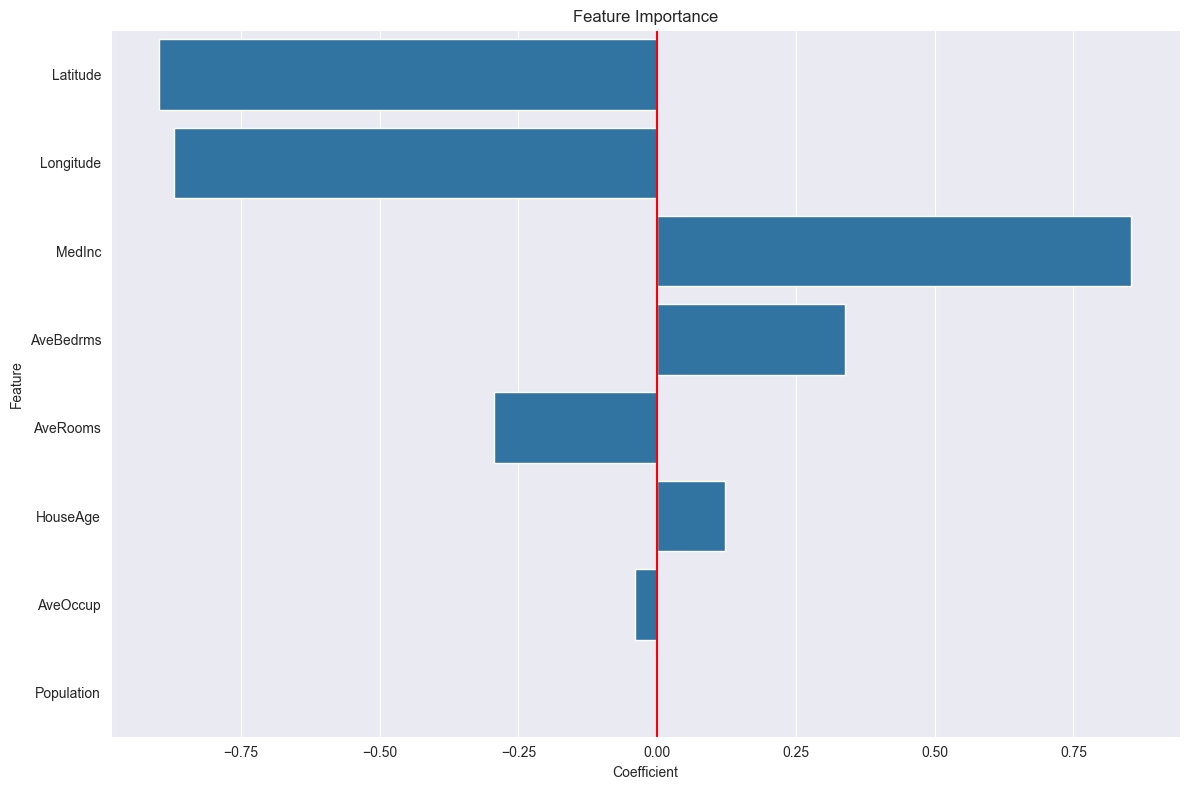

In [14]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

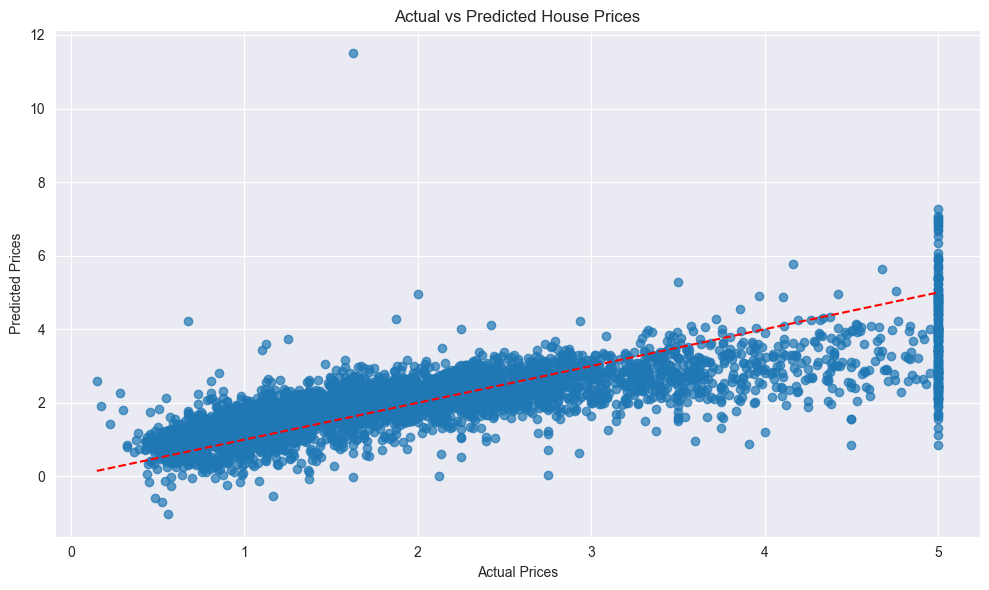

In [15]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

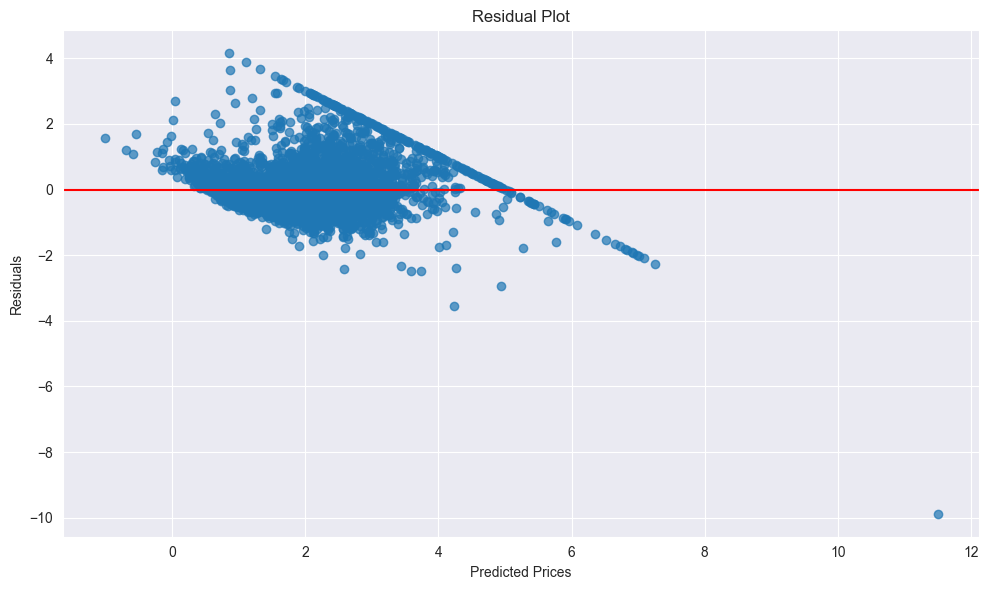

In [16]:
# Visualize residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()